In [2]:
### import libraries ###
from astropy.io import fits
from astropy import table
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Directories and file names #
dirCatalogs=r'/mnt/Data/Work/Sources/COSMOS/Catalogs/'

### Original catalogs
fileNameCOSMOS='01_COSMOS2015.fits'
fileNameSpectrZOrig='02_SpectrZ_ZLim.fits'
fileNameDeimosSpectrZOrig='02_DEIMOS_ZLim.fits'

In [5]:
tabCOSMOS2015=table.Table.read(dirCatalogs+fileNameCOSMOS,format='fits')
tabSpecZ=table.Table.read(dirCatalogs+fileNameSpectrZOrig,format='fits')
tabDEIMOS=table.Table.read(dirCatalogs+fileNameDeimosSpectrZOrig,format='fits')

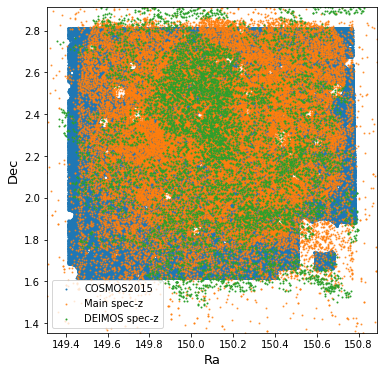

In [24]:
textSize=13
fig, axs=plt.subplots(1,1,figsize=(6,6))
axs.scatter(tabCOSMOS2015['RAJ2000'],tabCOSMOS2015['DEJ2000'],s=1,label='COSMOS2015')
axs.scatter(tabSpecZ['RA_corr'],tabSpecZ['Dec_corr'],s=1,alpha=0.7,label='Main spec-z')
axs.scatter(tabDEIMOS['Ra'],tabDEIMOS['Dec'],s=1,label='DEIMOS spec-z')
axs.set_xlim(tabCOSMOS2015['RAJ2000'].min()-0.1,tabCOSMOS2015['RAJ2000'].max()+0.1)
axs.set_ylim(tabCOSMOS2015['DEJ2000'].min()-0.26,tabCOSMOS2015['DEJ2000'].max()+0.1)
axs.set_xlabel('Ra',size=textSize)
axs.set_ylabel('Dec',size=textSize)
axs.legend(prop={'size': 10})
axs.set_aspect(1)

In [1]:
### Checking narrow band errors

In [6]:
dirCatalogs='/mnt/Data/Work/Sources/COSMOS/CatalogsFromWorkingPC/ex018/datasets'
fileNameTest='05_COSMOS_SpectrZ_Zlim_1p2_Test_SOMinfo.csv'

In [8]:
test=pd.read_csv(os.path.join(dirCatalogs,fileNameTest))

In [9]:
test.columns

Index(['RAJ2000', 'DEJ2000', 'Seq', 'Ksmagap3', 'Ymagap3', 'Hmagap3',
       'Jmagap3', 'Bmagap3', 'Vmagap3', 'ipmagap3', 'rmagap3', 'umagap3',
       'zppmagap3', 'IB574ap3', 'photoZ_SED', 'specZ', 'Instr', 'Q_f',
       'sc_Ksmagap3', 'sc_Ymagap3', 'sc_Hmagap3', 'sc_Jmagap3', 'sc_Bmagap3',
       'sc_Vmagap3', 'sc_ipmagap3', 'sc_rmagap3', 'sc_umagap3', 'sc_zppmagap3',
       'photoZ_ML', 'resid_ML', 'resid_SED', 'residML_SED', 'w_sc_Ksmagap3',
       'w_sc_Ymagap3', 'w_sc_Hmagap3', 'w_sc_Jmagap3', 'w_sc_Bmagap3',
       'w_sc_Vmagap3', 'w_sc_ipmagap3', 'w_sc_rmagap3', 'w_sc_umagap3',
       'w_sc_zppmagap3', 'quantErr', 'cellID_TrainSOM', 'cellID_RunSOM',
       'cellID_RunBigSOM', 'specZ_outlCoeff', 'photoZ_ML_outlCoeff',
       'photoZ_SED_outlCoeff', 'quantErr_outlCoeff', 'trainMapOccupation'],
      dtype='object')

In [15]:
cosmos=tabCOSMOS2015.to_pandas()

In [17]:
testAll=test.merge(cosmos,how='left',left_on='Seq',right_on='Seq')

In [20]:
testAll.columns[50:70]

Index(['trainMapOccupation', 'RAJ2000_y', 'DEJ2000_y', 'Ksmagap3_y',
       'e_Ksmagap3', 'Ymagap3_y', 'e_Ymagap3', 'Hmagap3_y', 'e_Hmagap3',
       'Jmagap3_y', 'e_Jmagap3', 'Bmagap3_y', 'e_Bmagap3', 'Vmagap3_y',
       'e_Vmagap3', 'ipmagap3_y', 'e_ipmagap3', 'rmagap3_y', 'e_rmagap3',
       'umagap3_y'],
      dtype='object')

In [24]:
list((c,round(testAll[c].median(),3)) for c in testAll.columns if 'e_' in c)

[('e_Ksmagap3', 0.015),
 ('e_Ymagap3', 0.014),
 ('e_Hmagap3', 0.017),
 ('e_Jmagap3', 0.014),
 ('e_Bmagap3', 0.037),
 ('e_Vmagap3', 0.033),
 ('e_ipmagap3', 0.015),
 ('e_rmagap3', 0.023),
 ('e_umagap3', 0.041),
 ('e_zpmagap3', 0.022),
 ('e_zppmagap3', 0.01),
 ('e_IA484ap3', 0.054),
 ('e_IA527ap3', 0.037),
 ('e_IA624ap3', 0.026),
 ('e_IA679ap3', 0.028),
 ('e_IA738ap3', 0.022),
 ('e_IA767ap3', 0.026),
 ('e_IB427ap3', 0.074),
 ('e_IB464ap3', 0.062),
 ('e_IB505ap3', 0.056),
 ('e_IB574ap3', 0.049),
 ('e_IB709ap3', 0.024),
 ('e_IB827ap3', 0.023),
 ('e_NB711ap3', 0.039),
 ('e_NB816ap3', 0.025),
 ('e_Hwmagap3', 0.051),
 ('e_Kswmagap3', 0.05),
 ('e_yHmagap3', 0.03),
 ('e_3_6mag', 0.009),
 ('e_4_5mag', 0.011),
 ('e_5_8mag', 0.393),
 ('e_8_0mag', 0.976),
 ('e_NUVmag', 0.145),
 ('e_FUVmag', 0.753)]

(array([3.933e+03, 1.266e+03, 4.420e+02, 1.660e+02, 7.000e+01, 3.600e+01,
        2.000e+01, 1.100e+01, 7.000e+00, 5.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([3.0000e-04, 2.6480e-02, 5.2660e-02, 7.8840e-02, 1.0502e-01,
        1.3120e-01, 1.5738e-01, 1.8356e-01, 2.0974e-01, 2.3592e-01,
        2.6210e-01, 2.8828e-01, 3.1446e-01, 3.4064e-01, 3.6682e-01,
        3.9300e-01, 4.1918e-01, 4.4536e-01, 4.7154e-01, 4.9772e-01,
        5.2390e-01]),
 <a list of 20 Patch objects>)

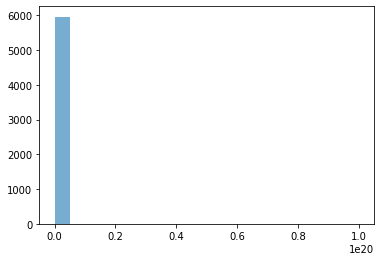

In [45]:
plt.hist(testAll['e_IB505ap3'],bins=20,alpha=0.6)
plt.hist(testAll['e_Hmagap3'],bins=20,alpha=0.6)
#plt.xlim(0,0.2)

In [42]:
from func_stat import *

In [53]:
print("ML",statResid(testAll[testAll['e_IB427ap3']>1],'resid_ML'))
print("SED",statResid(testAll[testAll['e_IB427ap3']>1],'resid_SED'))

ML {'Num objects': 81, 'Std': 0.035, 'NMAD': 0.025, 'Mean': -0.0035, '% outl_15': 0.0}
SED {'Num objects': 81, 'Std': 0.033, 'NMAD': 0.012, 'Mean': 0.0017, '% outl_15': 0.0}


In [54]:
print("ML",statResid(testAll[testAll['e_IB427ap3']<=1],'resid_ML'))
print("SED",statResid(testAll[testAll['e_IB427ap3']<=1],'resid_SED'))

ML {'Num objects': 5886, 'Std': 0.048, 'NMAD': 0.019, 'Mean': -0.0022, '% outl_15': 1.66}
SED {'Num objects': 5886, 'Std': 0.095, 'NMAD': 0.011, 'Mean': -0.0042, '% outl_15': 2.26}


In [55]:
### Check resids against spec-z

(0.21, 0.3)

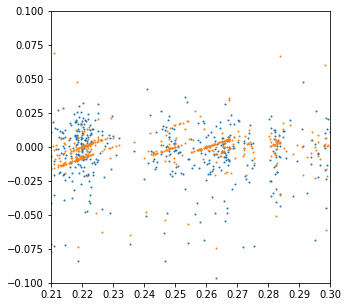

In [73]:
plt.figure(figsize=(5,5))
plt.scatter(test['specZ'],test['resid_ML'],s=1)
plt.scatter(test['specZ'],test['resid_SED'],s=1)
plt.ylim(-0.1,0.1)
plt.xlim(0.210,0.3)